In [14]:
import pandas as pd


In [15]:
data = pd.read_csv('eeg_features.csv')
print("Overview of the data: ")
print(data.shape)
print(data.head())

Overview of the data: 
(14426, 85)
   Subject   State  Channel_1_PSD  Channel_1_SE  Channel_2_PSD  Channel_2_SE  \
0        1  Normal   2.804631e-12      3.384060   3.021617e-20      1.244557   
1        1  Normal   4.716901e-12      2.832374   2.362112e-20      0.332428   
2        1  Normal   4.861129e-12      1.935872   1.503485e-20      0.323100   
3        1  Normal   3.026155e-12      3.145153   7.239844e-21      0.323345   
4        1  Normal   3.188129e-12      3.007020   2.413684e-21      0.334485   

   Channel_3_PSD  Channel_3_SE  Channel_4_PSD  Channel_4_SE  ...  \
0   3.527873e-11      2.054690   1.087782e-18      1.244557  ...   
1   2.515478e-11      1.782350   8.503603e-19      0.332428  ...   
2   2.176214e-11      1.994177   5.412547e-19      0.323100  ...   
3   1.583429e-11      2.409325   2.606344e-19      0.323345  ...   
4   1.068970e-11      2.347908   8.689264e-20      0.334485  ...   

   Channel_37_SE  Channel_38_PSD  Channel_38_SE  Channel_39_PSD  \
0       

In [16]:
print("Class Distribution: ") 
print(data['State'].value_counts())

Class Distribution: 
State
Fatigue    7216
Normal     7210
Name: count, dtype: int64


In [17]:
file = "eeg_features.csv"
df = pd.read_csv(file)

print("Missing values before preprocessing: \n",df.isnull().sum())

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after preprocessing:\n", df.isnull().sum())

df.to_csv('eeg_features_cleaned.csv', index=False)

Missing values before preprocessing: 
 Subject              0
State                0
Channel_1_PSD        0
Channel_1_SE         0
Channel_2_PSD        0
                  ... 
Channel_40_PSD       0
Channel_40_SE        0
Avg_Variance         0
Avg_Skewness      3604
Avg_Kurtosis      3604
Length: 85, dtype: int64

Missing values after preprocessing:
 Subject           0
State             0
Channel_1_PSD     0
Channel_1_SE      0
Channel_2_PSD     0
                 ..
Channel_40_PSD    0
Channel_40_SE     0
Avg_Variance      0
Avg_Skewness      0
Avg_Kurtosis      0
Length: 85, dtype: int64


C:\Users\Harish\AppData\Local\Temp\ipykernel_22860\2423845382.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

file_path = 'eeg_features_cleaned.csv'
df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('Subject')

imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.to_csv('eeg_features_scaled.csv', index=False, float_format='%.6f')


In [28]:
data = pd.read_csv('eeg_features_scaled.csv')
print(data.head())

   Subject   State  Channel_1_PSD  Channel_1_SE  Channel_2_PSD  Channel_2_SE  \
0        1  Normal      -0.184246      0.427037      -0.134444     -0.041723   
1        1  Normal      -0.184138     -0.933370      -0.136483     -1.012947   
2        1  Normal      -0.184129     -3.144057      -0.139138     -1.022880   
3        1  Normal      -0.184234     -0.162087      -0.141548     -1.022619   
4        1  Normal      -0.184224     -0.502708      -0.143040     -1.010756   

   Channel_3_PSD  Channel_3_SE  Channel_4_PSD  Channel_4_SE  ...  \
0      -0.108356     -2.468247       0.632124     -0.117541  ...   
1      -0.109162     -3.096211       0.479455     -0.654824  ...   
2      -0.109433     -2.607778       0.280691     -0.660319  ...   
3      -0.109905     -1.650525       0.100245     -0.660175  ...   
4      -0.110314     -1.792141      -0.011476     -0.653613  ...   

   Channel_37_SE  Channel_38_PSD  Channel_38_SE  Channel_39_PSD  \
0      -2.751374        0.834562       1.83

Applying PCA on the dataset

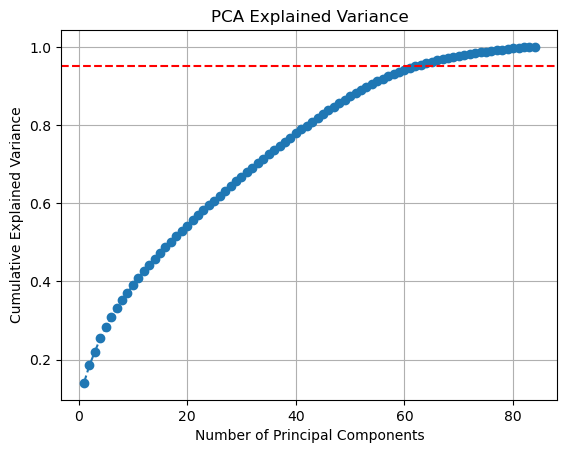

PCA applied with 62 components.


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_path = 'eeg_features_scaled.csv'
df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include=['number']).columns
df = df.dropna(subset=numeric_cols)  # Drops rows with NaN in numeric_cols
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

pca = PCA()
pca_result = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

optimal_components = next(i for i, v in enumerate(explained_variance) if v >= 0.95) + 1

pca_optimal = PCA(n_components=optimal_components)
pca_optimal_result = pca_optimal.fit_transform(scaled_data)

for i in range(optimal_components):
    df[f'PC{i+1}'] = pca_optimal_result[:, i]

df.to_csv('eeg_features_with_optimal_pca.csv', index=False)
print(f"PCA applied with {optimal_components} components.")
